In [1]:
import pandas as pd
from datetime import date
current_date = date.today()
filename = './dataset/data2.xls'
table=pd.read_excel(filename)
table.head()

,用户编号,缴费日期,缴费金额（元）
0,1000000001,2018-03-01,101
1,1000000001,2018-05-03,80
2,1000000001,2018-07-02,150
3,1000000001,2018-08-02,200
4,1000000001,2018-09-05,220


In [2]:
r=table.groupby('用户编号')['缴费日期'].max().reset_index()
r['R']=(pd.to_datetime(current_date) - r['缴费日期']).dt.days
r=r[['用户编号','R']]
r.head()

,用户编号,R
0,1000000001,1218
1,1000000002,1217
2,1000000003,1216
3,1000000004,944
4,1000000005,1216


In [3]:
#引入日期标签辅助列
table['日期标签'] = table['缴费日期'].astype(str).str[:10]

#把单个用户一天内订单合并 主要是将单日的付款日期设置为1，因为一个客户不可能在同一时刻下单多次
dup_f = table.groupby(['用户编号','日期标签'])['缴费日期'].count().reset_index()

#对合并后的用户统计频次
f = dup_f.groupby('用户编号')['缴费日期'].count().reset_index()
f.columns = ['用户编号','F']
f.head()

,用户编号,F
0,1000000001,8
1,1000000002,7
2,1000000003,7
3,1000000004,8
4,1000000005,7


In [4]:
sum_m = table.groupby('用户编号')['缴费金额（元）'].sum().reset_index()
sum_m.columns = ['用户编号','总支付金额']
com_m = pd.merge(sum_m,f,left_on = '用户编号',right_on = '用户编号',how = 'inner')
com_m['M'] = com_m['总支付金额']
com_m['R'] = r['R']
com_m

,用户编号,总支付金额,F,M,R
0,1000000001,987,8,987,1218
1,1000000002,490,7,490,1217
2,1000000003,1180,7,1180,1216
3,1000000004,621,8,621,944
4,1000000005,1500,7,1500,1216
...,...,...,...,...,...
95,1000000096,916,7,916,1219
96,1000000097,649,6,649,1219
97,1000000098,735,6,735,1278
98,1000000099,853,6,853,1219


In [5]:
com_m=com_m[["用户编号",'R','F','M']]
com_m

,用户编号,R,F,M
0,1000000001,1218,8,987
1,1000000002,1217,7,490
2,1000000003,1216,7,1180
3,1000000004,944,8,621
4,1000000005,1216,7,1500
...,...,...,...,...
95,1000000096,1219,7,916
96,1000000097,1219,6,649
97,1000000098,1278,6,735
98,1000000099,1219,6,853


In [6]:
mean_num1=com_m['R'].mean()
mean_num1

1222.03

In [7]:
std_num1=com_m['R'].std()
print(std_num1)
mean_num2=com_m['F'].mean()
print(mean_num2)
std_num2=com_m['F'].std()
print(std_num2)
mean_num3=com_m['M'].mean()
print(mean_num3)
std_num3=com_m['M'].std()
print(std_num3)

45.66842619923695
6.64
0.8350890595461884
705.24
184.40897237094808


In [8]:
def func1(val):
    num=(val-mean_num1)/std_num1
    return num
def func2(val):
    num=(val-mean_num2)/std_num2
    return num
def func3(val):
    num=(val-mean_num3)/std_num3
    return num
com_m.R=com_m.apply(lambda x: func1(x.R),axis=1)
com_m.F=com_m.apply(lambda x: func2(x.F),axis=1)
com_m.M=com_m.apply(lambda x: func3(x.M),axis=1)
com_m['CLV']=(-0.2)*com_m['R']+0.35*com_m['F']+0.45*com_m['M']
com_m['default']=0
com_m

C:\Users\Joker\AppData\Local\Temp\ipykernel_8488\207385684.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  com_m.R=com_m.apply(lambda x: func1(x.R),axis=1)
C:\Users\Joker\AppData\Local\Temp\ipykernel_8488\207385684.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  com_m.F=com_m.apply(lambda x: func2(x.F),axis=1)
C:\Users\Joker\AppData\Local\Temp\ipykernel_8488\207385684.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

,用户编号,R,F,M,CLV,default
0,1000000001,-0.088245,1.628569,1.527908,1.275207,0
1,1000000002,-0.110142,0.431092,-1.167188,-0.352324,0
2,1000000003,-0.132039,0.431092,2.574495,1.335813,0
3,1000000004,-6.088014,1.628569,-0.456811,1.582037,0
4,1000000005,-0.132039,0.431092,4.309769,2.116686,0
...,...,...,...,...,...,...
95,1000000096,-0.066348,0.431092,1.142894,0.678454,0
96,1000000097,-0.066348,-0.766385,-0.304974,-0.392204,0
97,1000000098,1.225573,-0.766385,0.161380,-0.440728,0
98,1000000099,-0.066348,-0.766385,0.801263,0.105603,0


In [9]:
Clv=com_m[['用户编号','CLV','default']]
Clv.head()

,用户编号,CLV,default
0,1000000001,1.275207,0
1,1000000002,-0.352324,0
2,1000000003,1.335813,0
3,1000000004,1.582037,0
4,1000000005,2.116686,0


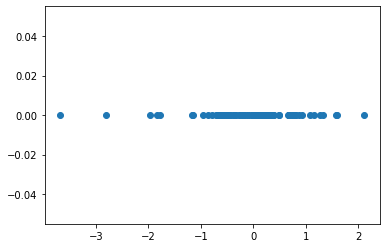

In [10]:
#KMeans聚类
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
x=Clv[['CLV','default']]
plt.scatter(Clv['CLV'], Clv['default'], marker='o')
plt.show()


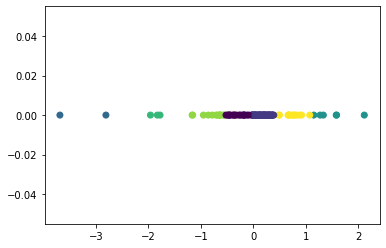

In [11]:
model = KMeans(n_clusters=7,max_iter=1000000)
model.fit(x)
predict_y=model.predict(x)
plt.scatter(Clv['CLV'], Clv['default'], c=predict_y)
plt.show()

In [12]:
df=pd.DataFrame(predict_y)
df.columns=['类别']
com_m['类别']=df['类别']
com_m

,用户编号,R,F,M,CLV,default,类别
0,1000000001,-0.088245,1.628569,1.527908,1.275207,0,3
1,1000000002,-0.110142,0.431092,-1.167188,-0.352324,0,0
2,1000000003,-0.132039,0.431092,2.574495,1.335813,0,3
3,1000000004,-6.088014,1.628569,-0.456811,1.582037,0,3
4,1000000005,-0.132039,0.431092,4.309769,2.116686,0,3
...,...,...,...,...,...,...,...
95,1000000096,-0.066348,0.431092,1.142894,0.678454,0,6
96,1000000097,-0.066348,-0.766385,-0.304974,-0.392204,0,0
97,1000000098,1.225573,-0.766385,0.161380,-0.440728,0,0
98,1000000099,-0.066348,-0.766385,0.801263,0.105603,0,1


In [13]:
from sklearn.naive_bayes import GaussianNB
X=com_m[['CLV','default']]
Y=com_m['类别']
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size = 0.2,random_state = 420)
gnb = GaussianNB()
gnb.fit(xtrain,ytrain)
y_p=gnb.predict(xtest)
# gnb.predict_proba(X)

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_p)

1.0

In [15]:
import pickle #pickle模块

#保存Model(注:save文件夹要预先建立，否则会报错)
with open('model/gnb.pickle', 'wb') as f:
    pickle.dump(gnb, f)